# Support Vector Machine (SVM)

### for more details check out my blog [here](https://www.vaishalilambe.com)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [3]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [4]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, y)

In [5]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

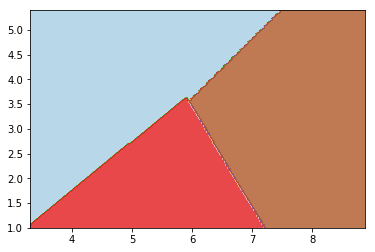

In [6]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

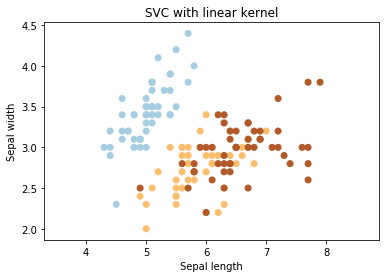

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [8]:
svc = svm.SVC(kernel='rbf', C=1,gamma=1).fit(X, y)

In [9]:
svc = svm.SVC(kernel='rbf', C=1,gamma=1).fit(X, y)

### Let’s have a quick example of support vector classification. First we need to create a dataset:

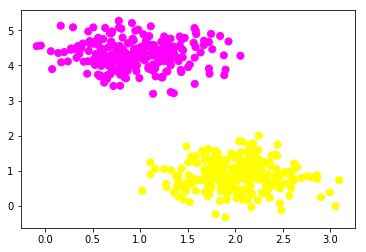

In [10]:
# importing scikit learn with make_blobs 
from sklearn.datasets.samples_generator import make_blobs 
  
# creating datasets X containing n_samples 
# Y containing two classes 
X, Y = make_blobs(n_samples=500, centers=2, 
                  random_state=0, cluster_std=0.40) 
  
# plotting scatters  
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring'); 
plt.show()  

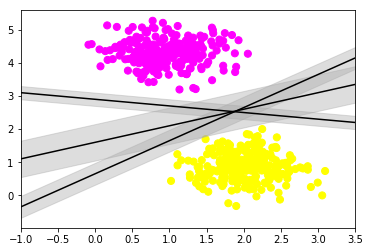

In [11]:
# creating line space between -1 to 3.5  
xfit = np.linspace(-1, 3.5) 
  
# plotting scatter 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring') 
  
# plot a line between the different sets of data 
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
    yfit = m * xfit + b 
    plt.plot(xfit, yfit, '-k') 
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',  
    color='#AAAAAA', alpha=0.4) 
  
plt.xlim(-1, 3.5); 
plt.show() 

### SVM and logistic regression models - Gender Recoginition by Voice

In [13]:
import seaborn as sns
%matplotlib inline

In [14]:
voice=pd.read_csv('voice.csv')

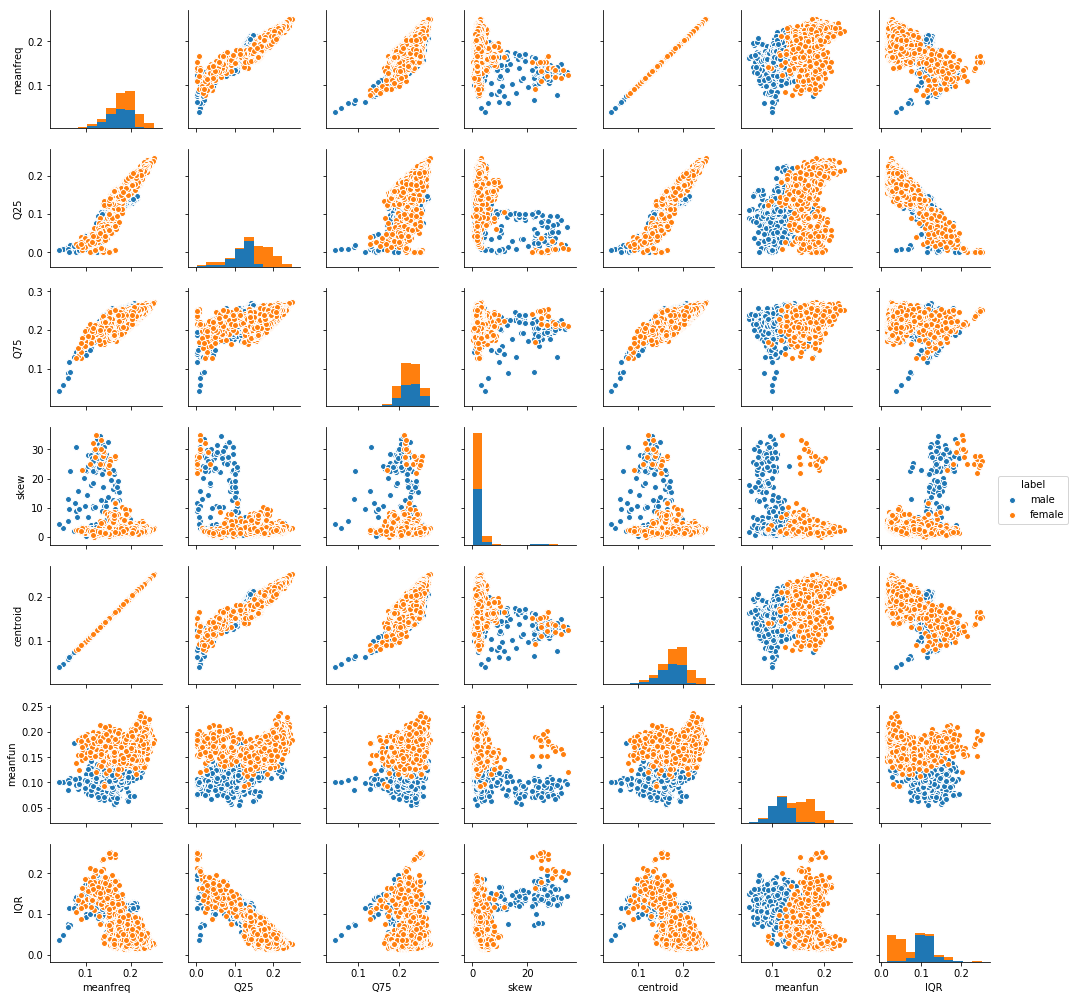

In [15]:
sns.pairplot(voice[['meanfreq', 'Q25', 'Q75', 'skew', 'centroid', 'label', 'meanfun', 'IQR']], 
                 hue='label', size=2)

In [16]:
#from this graph we deduce that a good precision can be reached by using only
#2 parameters: meanfun and IQR, because in their graph we can see that the male and female dots are quite
#seperated

In [17]:
#convert labels from string to 0/1
from sklearn.preprocessing import LabelEncoder
gender=LabelEncoder()
y=voice.iloc[:,-1]
y=gender.fit_transform(y)
X=voice.iloc[:,:-1]
y

array([1, 1, 1, ..., 0, 0, 0])

In [18]:
#standartizetion the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [19]:
#logistic reggression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel=LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
predictions=logmodel.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96       463
          1       0.96      0.97      0.96       488

avg / total       0.96      0.96      0.96       951

[[442  21]
 [ 14 474]]


In [23]:
#now we gonna use svc model
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_train,y_train)
predictions_svc=model_svc.predict(X_test)
print(classification_report(y_test,predictions_svc))
print(confusion_matrix(y_test,predictions_svc))

             precision    recall  f1-score   support

          0       0.97      0.98      0.98       463
          1       0.98      0.98      0.98       488

avg / total       0.98      0.98      0.98       951

[[455   8]
 [ 12 476]]
